# Exploring the H-2B Visa Programme

H-2B visas are nonimmigrant visas, which allow foreign nationals to enter the U.S. temporarily and engage in nonagricultural employment which is seasonal, intermittent, a peak load need, or a one-time occurrence.

**Summary** It turns out that Texas has the highest need for foreign unskilled employees. However, it is a Salmon farm  in Alaska that has requested the most and only offering them a wage of 10$ an hour.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel("H-2B_Disclosure_Data_FY15_Q4.xlsx")

In [3]:
df.head()

,CASE_NUMBER,DECISION_DATE,VISA_CLASS,NPC_SUBMITTED_DATE,CASE_STATUS,CERTIFICATION_BEGIN_DATE,CERTIFICATION_END_DATE,EMPLOYER_NAME,EMPLOYER_ADDRESS1,EMPLOYER_ADDRESS2,...,NAME_REQD_TRAINING,EMP_EXPERIENCE_REQD,EMP_EXP_NUM_MONTHS,WORKSITE_CITY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,OTHER_WORKSITE_LOCATION,SWA_NAME,JOB_IDNUMBER,JOB_START_DATE
0,H-400-13270-851270,2014-12-22,H-2B,2014-12-08,Certification,2014-12-22,2015-05-31,"Khan Enterprises, LLC",109 N. Highway 14-16,NaN,...,NaN,N,NaN,Gillette,WY,82716,N,Wyoming at Work,2564577,9/8/2014
1,H-400-13297-679503,2015-03-24,H-2B,2015-02-18,Certification,2015-04-01,2015-10-15,"EDD, LLC",489 A DEANNA LANE,NaN,...,NaN,Y,1.0,CHARLESTON,SC,29492,Y,SC Works Charleston SC Center,604182,2/6/2015
2,H-400-13310-940709,2015-01-23,H-2B,2015-01-06,Partial Certification,2015-04-01,2015-12-15,Brown's New Life Services LLC,"P. O. Box 734, Stuarts Draft, VA 24477 (mailing)",85 Shoffner Lane (physical),...,NaN,N,NaN,NaN,VA,NaN,NaN,VEC - Fishersville,507944,12/3/2014
3,H-400-13311-887843,2015-01-27,H-2B,2015-01-13,Certification,2015-04-01,2015-11-20,"UNITED SOCCER ACADEMY, INC.","12 MAIDEN LANE, SUITE 1",NaN,...,NaN,Y,24.0,NaN,NJ,NaN,NaN,Jobs4Jersey.com,125428,12/11/2014
4,H-400-13336-700772,2015-05-28,H-2B,2014-12-10,Withdrawn,2014-03-15,2014-12-15,LAWNS PLUS LLC,26242 EAST 121ST STREET,26242 EAST 121ST STREET,...,NaN,N,NaN,NaN,OK,NaN,NaN,OESC,1004311,11/15/2014


In [4]:
#df.info()

**1. How many requests did the Office of Foreign Labor Certification (OFLC) receive in 2015?**

In [5]:
df['CASE_NUMBER'].count()

6521

**2. How many jobs did that regard in total? And how many full time positions?**

In [6]:
df['NBR_WORKERS_REQUESTED'].sum()

126138

In [7]:
df.groupby('FULL_TIME_POSITION')['NBR_WORKERS_REQUESTED'].sum()

FULL_TIME_POSITION
N       287
Y    125794
Name: NBR_WORKERS_REQUESTED, dtype: int64

**3. How many jobs did the ETA National Processing Center actually certify?**

In [8]:
df['NBR_WORKERS_CERTIFIED'].sum()

101765

In [9]:
df.groupby('FULL_TIME_POSITION')['NBR_WORKERS_CERTIFIED'].sum()

FULL_TIME_POSITION
N         0
Y    101740
Name: NBR_WORKERS_CERTIFIED, dtype: int64

**4. What was the average pay? 

In [10]:
df.groupby('BASIC_UNIT_OF_PAY')['PREVAILING_WAGE'].mean()

BASIC_UNIT_OF_PAY
Bi-Weekly             287.143333
Hour                   12.641528
Month                2640.652632
Piece Rate             96.470000
Select Pay Range       15.065000
Week                  433.330820
Year                37673.240625
Name: PREVAILING_WAGE, dtype: float64

In [11]:
df.groupby('BASIC_UNIT_OF_PAY')['BASIC_UNIT_OF_PAY'].count()

BASIC_UNIT_OF_PAY
Bi-Weekly              6
Hour                6337
Month                 19
Piece Rate            14
Select Pay Range       4
Week                 122
Year                  17
Name: BASIC_UNIT_OF_PAY, dtype: int64

The majority of the jobs are payed hourly at an average rate of 12.65 $ an hour.

** 5. Who earned the least? And where are these people actually doing? **

In [12]:
worst_wage = df[df['BASIC_UNIT_OF_PAY'] == 'Hour'].sort_values(by='PREVAILING_WAGE', ascending=True).head()

This table displays the lowest payed jobs for which no workers were certified.

In [13]:
worst_wage[['BASIC_UNIT_OF_PAY', 'PREVAILING_WAGE', 'EMPLOYER_NAME', 'JOB_TITLE', 'WORKSITE_CITY', 'NBR_WORKERS_REQUESTED', 'NBR_WORKERS_CERTIFIED']]


,BASIC_UNIT_OF_PAY,PREVAILING_WAGE,EMPLOYER_NAME,JOB_TITLE,WORKSITE_CITY,NBR_WORKERS_REQUESTED,NBR_WORKERS_CERTIFIED
3598,Hour,0.00,CAESAR ENTERTAINMENT,2015 WSOP International Dealer/H2B Visa Applicant,LAS VEGAS,0,0
6505,Hour,2.00,MIKEL MAYS BEACHSIDE BAR AND GRILL,Waitress/Kitchen Help,Corpus Christi,1,0
106,Hour,2.13,Connor Concepts Inc.,Restaurant server and trainer,Knoxville,1,0
5927,Hour,3.25,MOTHER'S CANTINA LLC,Bartender,Ocean City,3,0
2670,Hour,3.75,MISSING TEETH LLC,Team Lead,Milford,1,0


In [14]:
lowest_wages_accepted = df[df['NBR_WORKERS_CERTIFIED'] != 0].sort_values(by='PREVAILING_WAGE', ascending=True).head()

And this table shows that landscape laborers are the ones that are earning the least.

In [15]:
lowest_wages_accepted[['BASIC_UNIT_OF_PAY', 'PREVAILING_WAGE', 'EMPLOYER_NAME', 'JOB_TITLE', 'WORKSITE_CITY', 'NBR_WORKERS_REQUESTED', 'NBR_WORKERS_CERTIFIED']]

,BASIC_UNIT_OF_PAY,PREVAILING_WAGE,EMPLOYER_NAME,JOB_TITLE,WORKSITE_CITY,NBR_WORKERS_REQUESTED,NBR_WORKERS_CERTIFIED
2508,Hour,7.25,The Munie Company - AL,Landscape Laborer,NaN,18,18
1293,Hour,7.25,"Infinity Lawn and Landscape, LLC",Landscape Laborer,NaN,20,20
1780,Hour,7.25,Greater Texas Landscapes - Denton,Landscape Laborer,NaN,90,90
5616,Hour,7.25,Cooper Roofing and Solar of Texas LLC.,General Laborer,NaN,10,10
5944,Hour,7.25,"Astro Homes, Inc.",General Laborers,NaN,8,8


**6. What was the most common unit of pay (daily, weekly, monthly)?**

In [16]:
df.groupby('BASIC_UNIT_OF_PAY')['BASIC_UNIT_OF_PAY'].count()

BASIC_UNIT_OF_PAY
Bi-Weekly              6
Hour                6337
Month                 19
Piece Rate            14
Select Pay Range       4
Week                 122
Year                  17
Name: BASIC_UNIT_OF_PAY, dtype: int64

**7. Work our total pay amount payed to H-2B laborers?**

In [17]:
#df.groupby('BASIC_UNIT_OF_PAY')['PREVAILING_WAGE'].describe()
#df.groupby('PREVAILING_WAGE').count()

**Approx.** ####Count * Mean (Year, Week, Month, Hour(8)(33 Million, Bi-Weekly (180'000)#### 40 million $.

**8. Were there any foreign companies hiring foreign workers in the US? If yes, work out averages by nation.**

In [18]:
df.groupby('EMPLOYER_COUNTRY')['EMPLOYER_COUNTRY'].count()

EMPLOYER_COUNTRY
UNITED STATES OF AMERICA    6519
Name: EMPLOYER_COUNTRY, dtype: int64

**9. Most common job title. Graph this.**

In [19]:
#x = df.groupby('JOB_TITLE')['JOB_TITLE'].value_counts()
df['JOB_TITLE'].value_counts().head(10)

Landscape Laborer                                     1259
LANDSCAPE LABORER                                      159
Landscape Laborers                                     153
Housekeeper                                            148
Laborer                                                118
Amusement and Recreation Attendants - Traveling Ca      98
Landscaping and Groundskeeping Workers                  94
HOUSEKEEPER                                             75
Amusement and Recreation Attendant                      63
Landscaper                                              60
Name: JOB_TITLE, dtype: int64

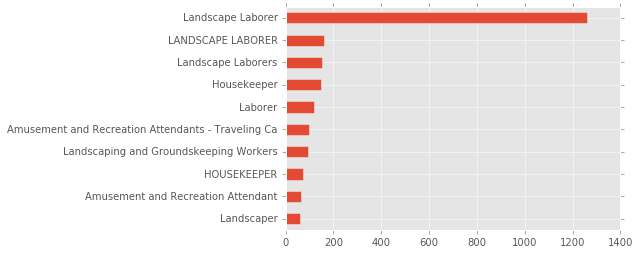

In [20]:
plt.style.use('ggplot')
df['JOB_TITLE'].value_counts(ascending=True).tail(10).plot(kind='barh')
plt.savefig("Top_Jobs.svg")

In [21]:
##Is there an efficient way for Pandas to clean the data? Merge "Landscape Laborer" with "LANDSCAPE LABORER" etc.?

**10. Which US states have the largest need for unskilled workers? Make a graph of this.**

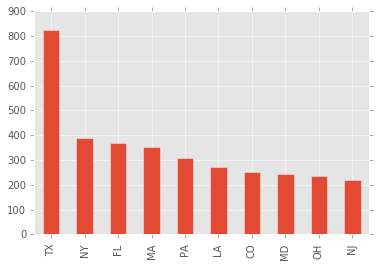

In [22]:
#x = df['EMPLOYER_STATE'].value_counts(ascending=False).head(10) * df['NBR_WORKERS_REQUESTED'].sum()
df['EMPLOYER_STATE'].value_counts(ascending=False).head(10).plot(kind='bar')
plt.savefig("semand_in_states.svg")

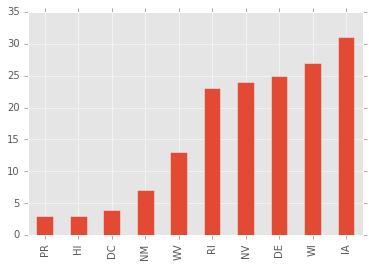

In [23]:
#x = df['EMPLOYER_STATE'].value_counts(ascending=False).head(10) * df['NBR_WORKERS_REQUESTED'].sum()
df['EMPLOYER_STATE'].value_counts(ascending=True).head(10).plot(kind='bar')
plt.savefig("demand_in_states.svg")

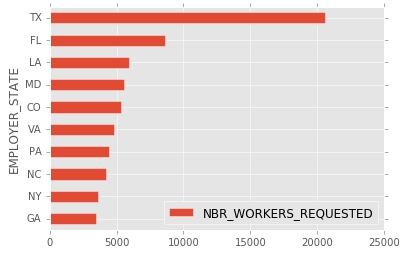

In [24]:
Workers_in_state_count = df.groupby('EMPLOYER_STATE')['NBR_WORKERS_REQUESTED'].sum()
Workers_in_state_count.sort_values(ascending=True).tail(10).plot(kind='barh', legend='NBR_WORKERS_REQUESTED')
plt.savefig("workers_requestet_in_states.svg")

**11. Which industries had the largest need?**

In [25]:
#changing df['NAIC_CODE'] from non_null object into int

In [26]:
#This .fillna(0.0) is magic. I found it here: 
#http://stackoverflow.com/questions/21291259/convert-floats-to-ints-in-pandas
#df['NAIC_CODE'] = df['NAIC_CODE'].fillna(0.0).astype(int)
#But it turns out, it only works for my one fill. Not on the other. Why?

Importing the NAIC_Codes from [here](http://www.census.gov/cgi-bin/sssd/naics/naicsrch?chart=2012).

In [27]:
NAIC_CODEs = pd.read_excel("6-digit_2012_Code.xls")

In [28]:
NAIC_CODEs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 2 columns):
NAICS2012    1065 non-null float64
Industry     1065 non-null object
dtypes: float64(1), object(1)
memory usage: 16.7+ KB


In [29]:
#Changing the NAIC_Codesfrom non-null object into float64

In [30]:
#NAIC_CODEs['NAICS12'] = df['NAIC_CODE'].fillna(0.0).astype(int)

In [31]:
NAIC_CODEs.head()

,NAICS2012,Industry
0,NaN,NaN
1,111110.0,Soybean Farming
2,111120.0,Oilseed (except Soybean) Farming
3,111130.0,Dry Pea and Bean Farming
4,111140.0,Wheat Farming


In [32]:
#And now reimporting the original file. 

In [33]:
df = pd.read_excel("H-2B_Disclosure_Data_FY15_Q4.xlsx")

In [34]:
#now in the NAIC_CODE is a Float64 in the cells we want to merge.

In [35]:
df_merged = df.merge(NAIC_CODEs, how = 'left', left_on = 'NAIC_CODE', right_on ='NAICS2012') 

In [36]:
#df_merged.info()

In [37]:
df_merged['Industry'].value_counts().head(10)

Landscaping Services                                     2190
Hotels (except Casino Hotels) and Motels                  584
All Other Amusement and Recreation Industries             247
Golf Courses and Country Clubs                            230
Support Activities for Forestry                           132
Other Spectator Sports                                    122
Poured Concrete Foundation and Structure Contractors       87
Sports and Recreation Instruction                          69
All Other Specialty Trade Contractors                      65
Full-Service Restaurants                                   63
Name: Industry, dtype: int64

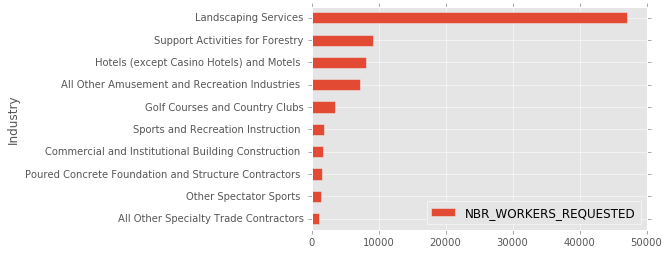

In [38]:
workers_by_industry = df_merged.groupby('Industry')['NBR_WORKERS_REQUESTED'].sum()
workers_by_industry.sort_values(ascending=True).tail(10).plot(kind='barh', legend='NBR_WORKERS_REQUESTED')
plt.savefig("workers_by_industry.svg")

**12. Which companies had the largest need? Compare acceptance/denials of each company.**

In [39]:
df['EMPLOYER_NAME'].value_counts().head(5)

THE BRICKMAN GROUP LTD LLC    38
Landscapes Unlimited, LLC     34
VALLEYCREST COMPANIES         24
Challenger Sports Corp.       24
PCH HOTELS & RESORTS, INC.    20
Name: EMPLOYER_NAME, dtype: int64

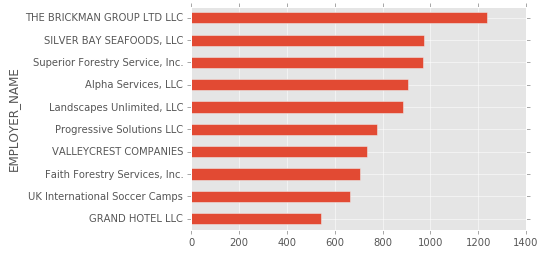

In [40]:
company_workers_demand = df.groupby('EMPLOYER_NAME')['NBR_WORKERS_REQUESTED'].sum()
company_workers_demand.sort_values(ascending=True).tail(10).plot(kind='barh')
plt.savefig("company_workers_demand.svg")

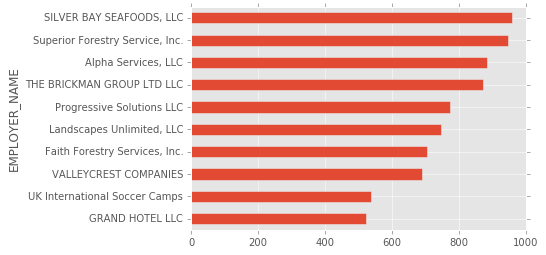

In [41]:
company_workers_demand = df.groupby('EMPLOYER_NAME')['NBR_WORKERS_CERTIFIED'].sum()
company_workers_demand.sort_values(ascending=True).tail(10).plot(kind='barh')
plt.savefig("company_workers_demand.svg")

***BONUS*** Looking into [Silver Bay Seafoods](http://www.silverbayseafoods.com/about.html) and [UK International Soccer Campus](http://www.uksocca.com/). 


Silver Bay's claim: [Silver Bays's "...primary strength is in its combination of having a state of the art processing plant and favorable logistics to support its operations; competent management and key personnel; an established fish buying system; and ownership by fishermen who represent over 80% of the committed fishing effort."] How much does the company pay it's workers on average?

In [42]:
SILVER_BAY_SEAFOODS = df[df['EMPLOYER_NAME'] == 'SILVER BAY SEAFOODS, LLC']

In [43]:
SILVER_BAY_SEAFOODS[['JOB_TITLE', 'PREVAILING_WAGE', 'HOURLY_WORK_SCHEDULE_AM', 'HOURLY_WORK_SCHEDULE_PM', 'OVERTIME_RATE_FROM', 'OVERTIME_RATE_TO', 'NATURE_OF_TEMPORARY_NEED', 'NBR_WORKERS_REQUESTED', 'NBR_WORKERS_CERTIFIED']]

,JOB_TITLE,PREVAILING_WAGE,HOURLY_WORK_SCHEDULE_AM,HOURLY_WORK_SCHEDULE_PM,OVERTIME_RATE_FROM,OVERTIME_RATE_TO,NATURE_OF_TEMPORARY_NEED,NBR_WORKERS_REQUESTED,NBR_WORKERS_CERTIFIED
5099,Salmon Processor,10.0,6:00:00 AM,10:00:00 PM,10.0,10.0,Seasonal,975,959


In [44]:
SOCCER_CAMPS = df[df['EMPLOYER_NAME'] == 'UK International Soccer Camps']
SOCCER_CAMPS[['JOB_TITLE', 'PREVAILING_WAGE', 'HOURLY_WORK_SCHEDULE_AM', 'HOURLY_WORK_SCHEDULE_PM', 'OVERTIME_RATE_FROM', 'OVERTIME_RATE_TO', 'NATURE_OF_TEMPORARY_NEED', 'NBR_WORKERS_REQUESTED', 'NBR_WORKERS_CERTIFIED']]

,JOB_TITLE,PREVAILING_WAGE,HOURLY_WORK_SCHEDULE_AM,HOURLY_WORK_SCHEDULE_PM,OVERTIME_RATE_FROM,OVERTIME_RATE_TO,NATURE_OF_TEMPORARY_NEED,NBR_WORKERS_REQUESTED,NBR_WORKERS_CERTIFIED
1943,Soccer Coach,24.0,1:00:00 PM,8:00:00 PM,24.0,NaN,Seasonal,125,125
2345,Soccer Coach,24.0,1:00:00 PM,8:00:00 PM,24.0,NaN,Seasonal,80,80
3701,Soccer Coach,18.0,1:00:00 PM,8:00:00 PM,18.0,NaN,Seasonal,125,0
5238,Soccer Coach,19.0,1:00:00 PM,8:00:00 PM,19.0,NaN,Seasonal,50,50
5550,Soccer Coach,20.0,1:00:00 AM,8:00:00 PM,20.0,NaN,Seasonal,23,23
5558,Soccer Coach,18.0,1:00:00 AM,8:00:00 PM,18.0,NaN,Seasonal,125,125
5734,Soccer Coach,18.0,1:00:00 PM,8:00:00 PM,18.0,NaN,Seasonal,75,75
6397,Soccer Coach,20.0,1:00:00 PM,8:00:00 PM,20.0,NaN,Seasonal,60,60


In [45]:
df_unfaelle.groupby('Jahr')[(df_unfaelle['Lichtverhältnis UAP'] == 622)]

NameError: name 'df_unfaelle' is not defined